<a href="https://colab.research.google.com/github/Shreyash-Padeer/AIL721-Proj/blob/main/EDA_walmart_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

train_df=pd.read_csv('/content/train.csv')
features_df=pd.read_csv('/content/features.csv')
stores_df=pd.read_csv('/content/stores.csv')
datas = [train_df, features_df, stores_df]

In [ ]:
for data in datas:
    print(data.shape)
    display(data.head())
    print(50*"-")

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


--------------------------------------------------
(8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


--------------------------------------------------
(45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


--------------------------------------------------


# DATA PREPARATION & CLEANING
Merging the features and training data to get cumulative insights from overall

In [ ]:
features_stores = pd.merge(features_df, stores_df, on='Store')

train_data = pd.merge(train_df, features_stores, on=['Store', 'Date'], how='left')

print(train_data.shape)
display(train_data.head())


(421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


Identify and remove columns with more than 30% null values

In [ ]:
null_percentage = train_data.isnull().sum() / len(train_data) * 100

columns_to_drop = null_percentage[null_percentage > 30].index
print("Columns who contains more than 30% null values:", columns_to_drop)

train_data = train_data.drop(columns=columns_to_drop)

train_data.shape

Columns who contains more than 30% null values: Index(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], dtype='object')


(421570, 12)

In [ ]:
train_data.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0
Type,0
Size,0


Removing negative sales

In [ ]:
train_data = train_data.loc[train_data['Weekly_Sales']>=0]
train_data

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,IsHoliday
0,1,1,2010-02-05,24924.50,42.31,2.572,211.096358,8.106,A,151315,0
224669,23,79,2010-02-05,35265.03,15.25,2.788,131.527903,5.892,B,114533,0
224660,23,78,2010-02-05,12.00,15.25,2.788,131.527903,5.892,B,114533,0
187907,20,5,2010-02-05,56536.02,25.92,2.784,204.247194,8.187,A,203742,0
152265,16,32,2010-02-05,3852.56,19.79,2.580,189.381697,7.039,B,57197,0
...,...,...,...,...,...,...,...,...,...,...,...
268838,28,13,2012-10-26,35417.45,65.95,4.301,131.193097,10.199,A,206302,0
157749,17,2,2012-10-26,43451.19,39.94,3.755,131.193097,5.527,B,93188,0
44379,5,34,2012-10-26,3200.56,71.70,3.506,224.037814,5.422,B,34875,0
81626,9,22,2012-10-26,5489.69,69.52,3.506,227.232807,4.954,B,125833,0


In [ ]:
train_data = train_data.sort_values(by='Date')
train_data

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,IsHoliday
0,1,1,2010-02-05,24924.50,42.31,2.572,211.096358,8.106,A,151315,0
138549,15,4,2010-02-05,11694.61,19.83,2.954,131.527903,8.350,B,123737,0
224669,23,79,2010-02-05,35265.03,15.25,2.788,131.527903,5.892,B,114533,0
224660,23,78,2010-02-05,12.00,15.25,2.788,131.527903,5.892,B,114533,0
187907,20,5,2010-02-05,56536.02,25.92,2.784,204.247194,8.187,A,203742,0
...,...,...,...,...,...,...,...,...,...,...,...
267551,28,4,2012-10-26,26239.54,65.95,4.301,131.193097,10.199,A,206302,0
157462,16,98,2012-10-26,88.77,40.99,3.686,199.219532,5.847,B,57197,0
267408,28,3,2012-10-26,8104.09,65.95,4.301,131.193097,10.199,A,206302,0
44522,5,35,2012-10-26,248.91,71.70,3.506,224.037814,5.422,B,34875,0


# Data Analysis

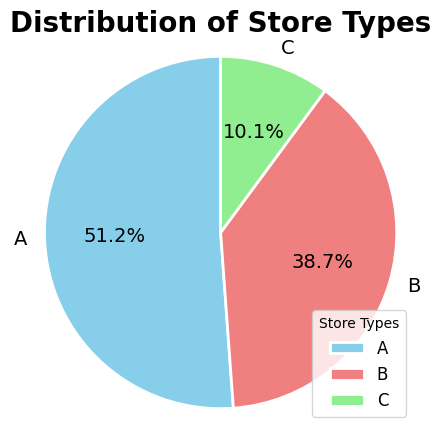

In [ ]:
import matplotlib.pyplot as plt

type_counts = train_data['Type'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(type_counts,
        labels=type_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['skyblue', 'lightcoral', 'lightgreen'],
        textprops={'fontsize': 14},
        wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

plt.title('Distribution of Store Types', fontsize=20, fontweight='bold')
plt.axis('equal')
plt.legend(title="Store Types", loc="best", fontsize=12)
plt.show()


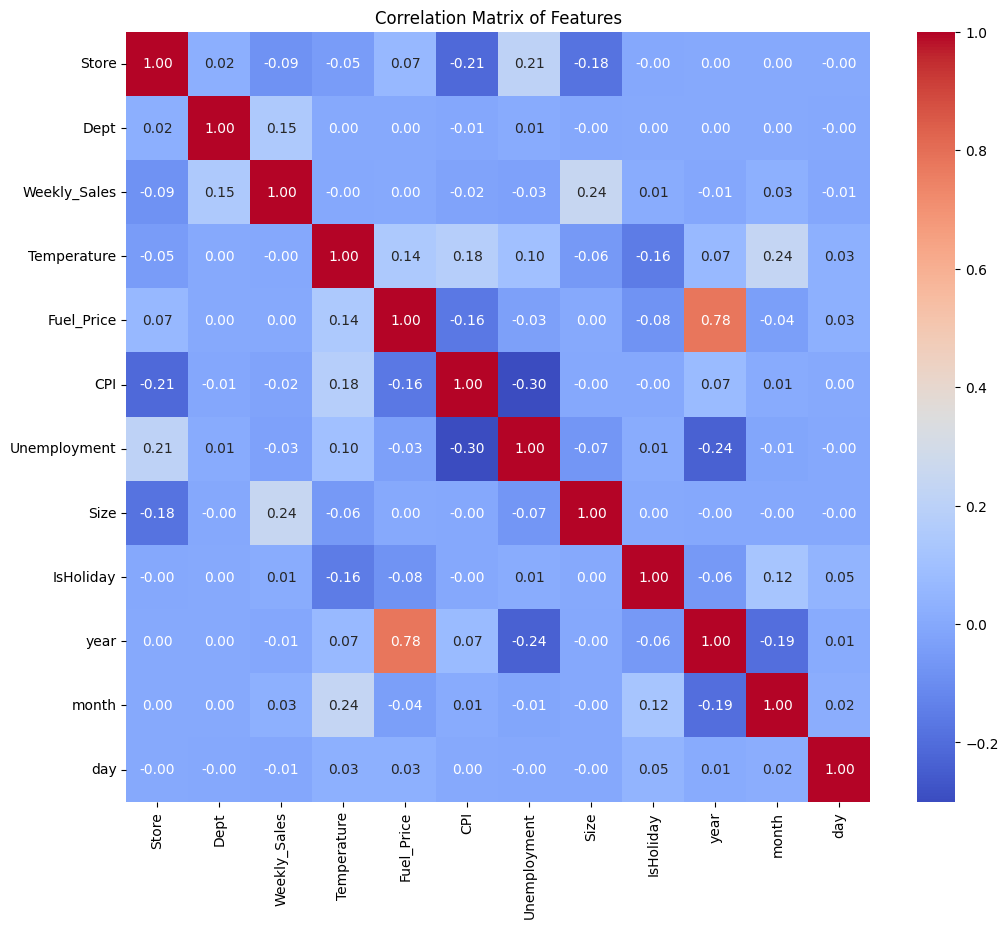

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

train_data['year'] = pd.DatetimeIndex(train_data['Date']).year
train_data['month'] = pd.DatetimeIndex(train_data['Date']).month
train_data['day'] = pd.DatetimeIndex(train_data['Date']).day


train_data['Date'] = pd.to_datetime(train_data['Date'])

numerical_features = train_data.select_dtypes(include=['number'])

correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
train_data['Week'] = train_data.Date.dt.isocalendar().week

In [ ]:
train_data.sample(10)

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,IsHoliday,year,month,day,Week
161707,17,32,2010-03-05,4653.23,31.58,2.681,126.578286,6.548,B,93188,0,2010,3,5,9
138351,15,2,2011-10-14,23812.57,61.30,3.744,136.515097,7.866,B,123737,0,2011,10,14,41
165882,17,83,2012-01-27,459.96,29.99,3.058,130.314452,6.403,B,93188,0,2012,1,27,4
417765,45,46,2012-02-24,14759.54,42.86,3.739,190.006988,8.424,B,118221,0,2012,2,24,8
418741,45,60,2010-06-18,158.40,72.62,2.780,182.442420,8.899,B,118221,0,2010,6,18,24
266151,27,93,2011-05-13,56017.84,60.07,4.211,138.495929,7.725,A,204184,0,2011,5,13,19
166073,17,87,2010-04-02,7265.20,36.94,2.842,126.603484,6.635,B,93188,0,2010,4,2,13
289793,30,34,2010-12-10,1.00,46.35,2.843,211.124799,8.163,C,42988,0,2010,12,10,49
55356,6,54,2011-06-17,188.84,87.08,3.637,216.537162,6.855,A,202505,0,2011,6,17,24
124046,13,50,2011-07-22,2785.00,78.50,3.563,129.150774,6.877,A,219622,0,2011,7,22,29


In [ ]:
import pandas as pd
import plotly.express as px

year_2010_data = train_data[train_data['year'] == 2010]
year_2011_data = train_data[train_data['year'] == 2011]
year_2012_data = train_data[train_data['year'] == 2012]

date_sales_2010 = year_2010_data.groupby('Date')['Weekly_Sales'].sum().reset_index()
date_sales_2011 = year_2011_data.groupby('Date')['Weekly_Sales'].sum().reset_index()
date_sales_2012 = year_2012_data.groupby('Date')['Weekly_Sales'].sum().reset_index()

date_sales_2010['Year'] = '2010'
date_sales_2011['Year'] = '2011'
date_sales_2012['Year'] = '2012'

combined_data = pd.concat([date_sales_2010, date_sales_2011, date_sales_2012])

fig = px.line(combined_data, x='Date', y='Weekly_Sales', color='Year',
              title='Weekly Sales Over Time (2010-2012)')
fig.show()

In [ ]:
store_date_sales = train_data.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()

fig = px.line(store_date_sales, x='Date', y='Weekly_Sales', color='Store',
              title='Weekly Sales Over Time by Store')
fig.show()


In [ ]:
weekly_sales_by_year = train_data.groupby(['year', 'Week'])['Weekly_Sales'].sum().reset_index()

fig = px.line(weekly_sales_by_year,
              x='Week',
              y='Weekly_Sales',
              color='year',
              title='Weekly Sales vs. Week Number (by Year)')
fig.show()


In [ ]:
month_wise_sales = pd.pivot_table(train_data, values = "Weekly_Sales", columns = "year", index = "month")
month_wise_sales

year,2010,2011,2012
month,,,
1,NaN,14048.348515,14304.774064
2,16115.148511,15904.117630,16112.853323
3,15476.271493,15241.333119,15626.987004
4,15784.325587,15400.713958,15944.188683
5,16061.212479,15424.052663,16049.064164
6,16548.757204,16263.172898,16375.934160
7,16007.065129,15772.449686,15936.706288
8,16201.136071,16082.682055,16057.945396
9,15170.876851,15013.965477,15283.248527


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

for column in month_wise_sales.columns:
    fig.add_trace(go.Scatter(x=month_wise_sales.index, y=month_wise_sales[column], mode='lines+markers', name=str(column)))

fig.update_layout(title="Month-wise Average Sales by Year",
                  xaxis_title="Month",
                  yaxis_title="Weekly Sales",
                  xaxis=dict(tickmode='linear', tick0=1, dtick=1))

fig.show()


In [ ]:
week_wise_sales = pd.pivot_table(train_data, values="Weekly_Sales", columns="year", index="Week")
week_wise_sales


year,2010,2011,2012
Week,,,
1,NaN,14679.587323,15172.381502
2,NaN,13943.726767,14235.607558
3,NaN,13970.742375,14274.786404
4,NaN,13599.030391,13530.950119
5,16876.145176,15822.286850,15511.884823
6,16390.912208,16150.398124,16703.472478
7,16249.714685,16553.243174,16732.441827
8,14940.686595,15085.818752,15489.637807
9,15964.821240,15947.340322,15693.684826


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

for column in month_wise_sales.columns:
    fig.add_trace(go.Scatter(x=week_wise_sales.index, y=week_wise_sales[column], mode='lines+markers', name=str(column)))

fig.update_layout(title="Week-wise Average Sales by Year",
                  xaxis_title="Week",
                  yaxis_title="Weekly Sales",
                  xaxis=dict(tickmode='linear', tick0=1, dtick=1))

fig.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np

# Ensure Date is datetime
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['month'] = train_data['Date'].dt.month
train_data['year'] = train_data['Date'].dt.year

# Create pivot table
monthly_sales = pd.pivot_table(train_data, values="Weekly_Sales", columns="year", index="month", aggfunc="sum")

# Replace month numbers with names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sales.index = month_names

# Format z values with rounded numbers for annotations
z_text = np.round(monthly_sales.values / 1e6, 1).astype(str) + 'M'

# Create annotated heatmap
fig = go.Figure(data=go.Heatmap(
    z=monthly_sales.values,
    x=monthly_sales.columns.astype(str),
    y=monthly_sales.index,
    text=z_text,
    texttemplate="%{text}",
    textfont={"size": 12},
    colorscale='Cividis',
    colorbar=dict(title='Sales ($)', titleside='right')
))

fig.update_layout(
    title={
        'text': "Monthly Seasonality of Weekly Sales (in Millions)",
        'x': 0.5,
        'xanchor': 'center',
        'font': dict(size=20)
    },
    xaxis_title="Year",
    yaxis_title="Month",
    yaxis=dict(autorange="reversed", showgrid=False),
    xaxis=dict(showgrid=False),
    template="plotly_white",
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.show()


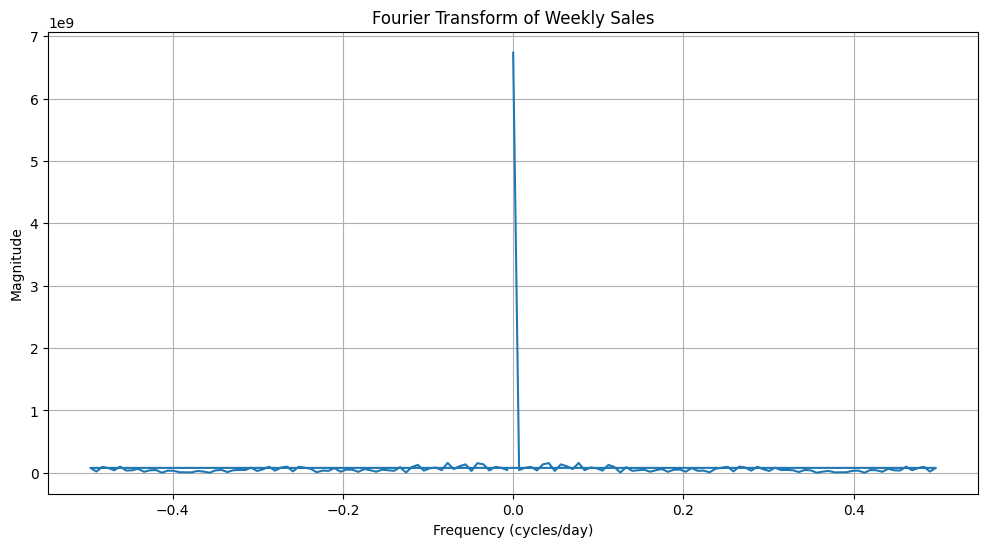

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

train_data['Date'] = pd.to_datetime(train_data['Date'])

date_sales = train_data.groupby('Date')['Weekly_Sales'].sum()

time_series = date_sales.values

time_vector = np.arange(len(time_series))

yf = fft(time_series)
xf = fftfreq(len(time_series), 1)

plt.figure(figsize=(12, 6))
plt.plot(xf, np.abs(yf))
plt.title('Fourier Transform of Weekly Sales')
plt.xlabel('Frequency (cycles/day)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


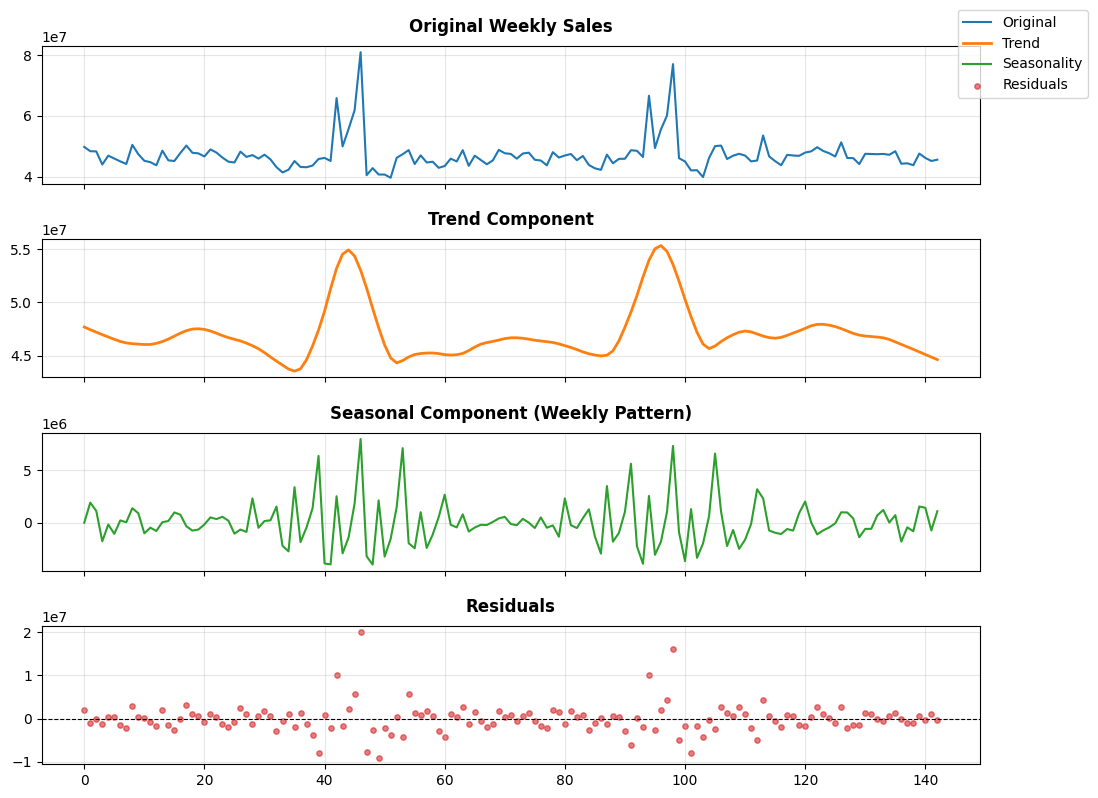

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

colors = {
    'original': '#1f77b4',  # Blue
    'trend': '#ff7f0e',     # Orange
    'seasonal': '#2ca02c',  # Green
    'resid': '#d62728'      # Red
}

store_date_sales = train_data.groupby(['Date'])['Weekly_Sales'].sum().reset_index()

stl = STL(store_date_sales['Weekly_Sales'], period=7)
stl_result = stl.fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

ax1.plot(stl_result.observed, color=colors['original'], linewidth=1.5)
ax1.set_title('Original Weekly Sales', fontsize=12, pad=10, fontweight='bold')
ax1.grid(alpha=0.3)

ax2.plot(stl_result.trend, color=colors['trend'], linewidth=2)
ax2.set_title('Trend Component', fontsize=12, pad=10, fontweight='bold')
ax2.grid(alpha=0.3)

ax3.plot(stl_result.seasonal, color=colors['seasonal'], linewidth=1.5)
ax3.set_title('Seasonal Component (Weekly Pattern)', fontsize=12, pad=10, fontweight='bold')
ax3.grid(alpha=0.3)

ax4.scatter(stl_result.resid.index,
            stl_result.resid,
            color=colors['resid'],
            s=15,
            alpha=0.6)
ax4.axhline(0, color='black', linestyle='--', linewidth=0.8)
ax4.set_title('Residuals', fontsize=12, pad=10, fontweight='bold')
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)

fig.legend(['Original', 'Trend', 'Seasonality', 'Residuals'],
           loc='upper right',
           bbox_to_anchor=(1.1, 1),
           frameon=True)

plt.show()